<a href="https://colab.research.google.com/github/hussain0048/Computer-Vision-/blob/main/Introduction_to_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 1 - Introduction to Computer Vision**

**Table of Content**
1. How to load an image using the cv2 library?
2. True nature of an image
3. How to convert an image from one colorspace to another?
4. How to compare RGB and BGR channels?
5. How to plot an image by creating an array?
6. How to compare different channels of a single colorspace?

##**1-Load the image and change the colorspace**

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import cv2

When we load the image using the cv2 library, the image is by default loaded in BGR colorspace. For our use, we will convert it into RGB and GRAY colorspace using the following code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the image
img = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/img1.jpg')
# Change the image into desired colorspace
grayscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

## **1.2-Plot the image in all the colorspaces using matplotlib subplots**

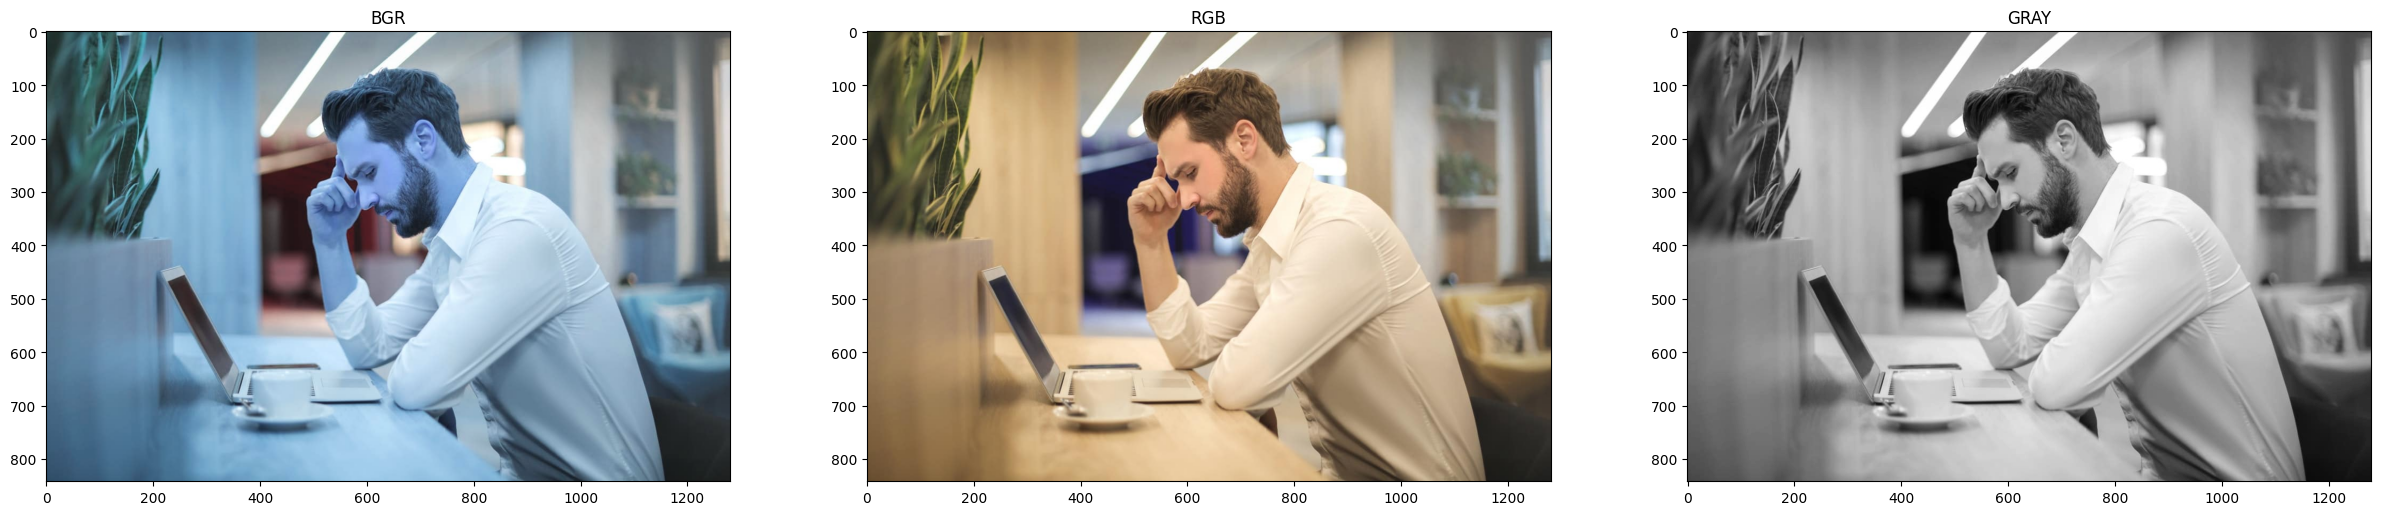

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,8))
ax1.set_title('BGR')
ax1.imshow(img)
ax2.set_title('RGB')
ax2.imshow(rgb)
ax3.set_title('GRAY')
ax3.imshow(grayscale,cmap='gray')

## **1.3-shape of the image**

In [ ]:
print(img.shape)

(842, 1280, 3)


In [ ]:
print(img[:1,:1])

[[[43 66 62]]]


2160 x 4096 is the dimension of the image I used, where 2160 is the height, and 4096 is the width of the image. The 3 stands for each value of that pixel for a single color. In the latter code, 55 represents the intensity of the blue color, 24 for the green color, and 1 for the red color, since img was by default in BGR colorspace.

##**1.4-Show pixel of image on screen**

In [ ]:
!pip install Pillow


In [ ]:
import PIL.Image

In [ ]:
# module, which is a Python library for working with images. Then, it will define a function called
image = PIL.Image.open('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/img1.jpg')

In [ ]:
pixel = image.getpixel((40, 70))

NameError: ignored

In [ ]:
print(pixel)

(66, 64, 41)


## **1.5-Crop Image**

(310, 490, 3)


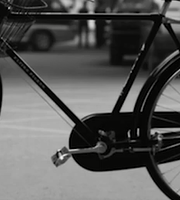

In [ ]:
# Import packages
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
img = cv.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1.png')
print(img.shape) # Print image shape
#cv.imshow("original", img)
# Cropping an image
cropped_image = img[80:280, 150:330]
cv2_imshow(cropped_image)

## **1-5-know the value of any pixel in grayscale image**

In [ ]:
x,y = 1000,1000
at_1000 = grayscale[x,y]
print(at_1000)

In [ ]:
grayscale[1000,1000,]

## **1-5-Generate various images by creating an array**

Let us generate the alphabet S using a numpy array.



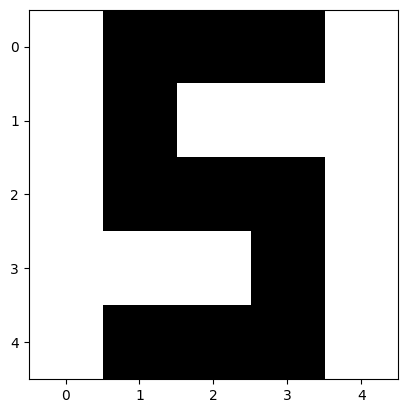

In [ ]:
Letter_S = np.array([[255, 0, 0, 0, 255],
                      [255, 0, 255, 255, 255],
                      [255, 0, 0, 0, 255],
                      [255, 255, 255, 0, 255],
                      [255, 0, 0, 0, 255]])
plt.imshow(Letter_S,cmap='gray')

## **1-6-Plot Each Color Channel from RGB colorspace**

In [ ]:
# Store values of each channel in different array
r = rgb[:,:,0]
g = rgb[:,:,1]
b = rgb[:,:,2]

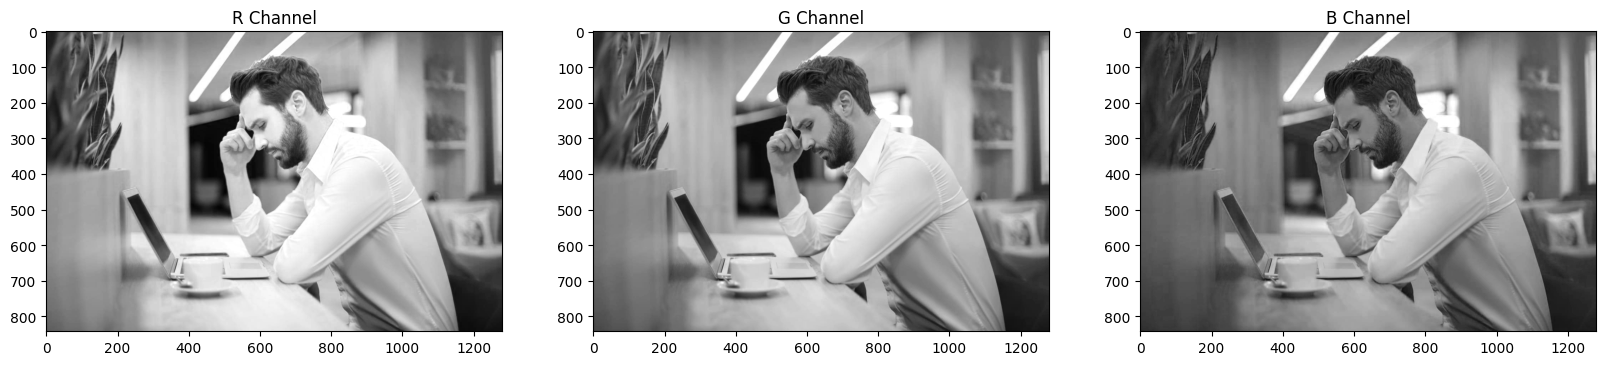

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title('R Channel')
ax1.imshow(r, cmap='gray')

ax2.set_title('G Channel')
ax2.imshow(g,cmap='gray')

ax3.set_title('B Channel')
ax3.imshow(b,cmap='gray')

# **Chapter 2:Background Replacement Of An Image**

**Table of Content**

1. Creating a mask for an image
2. Removing the existing background of the image
3. Replacing the background with the image of our choice

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/img1.jpg')
background = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/background image.jpg')
print('Type:', type(image),
      ' dimensions:', image.shape)

Type: <class 'numpy.ndarray'>  dimensions: (842, 1280, 3)


## **2.1. Function to change the colorspace**



In [ ]:
# Function to convert colorspace from BGR to RGB
def BGR2RGB(BGR_image):
    return cv2.cvtColor(BGR_image,cv2.COLOR_BGR2RGB)

image = BGR2RGB(image)
background = BGR2RGB(background)

## **2.2-. Create a copy and display the image**



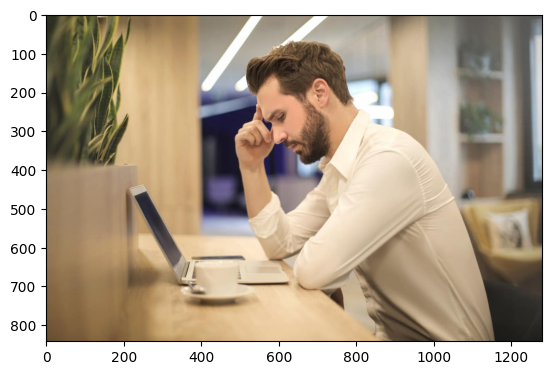

In [ ]:
image_copy = np.copy(image)
plt.imshow(image_copy)

## **2.3. Declare Section Boundaries and create a mask**



In [ ]:
# Next step is to declare the boundaries
lower_range = np.array([0,230,0])
upper_range = np.array([100,255,100])

# Creating a mask
masked = cv2.inRange(image,lower_range,upper_range)
plt.imshow(masked,cmap='Blues_r')

## **2.4-Using the mask on the copy of an original image**

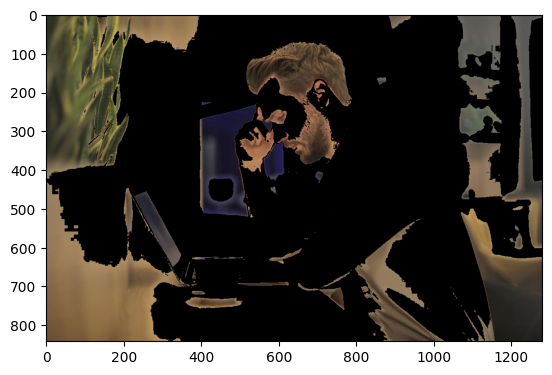

In [ ]:
# storing original image in new variable
masked_image = np.copy(image)
# Step - 1: Region where mask value is not zero i.e not black (mask != 0) is to be turn black in newly stored original image
masked_image[mask!=0] = [0,0,0]
plt.imshow(masked_image,cmap='gray')

## **2.5-. Using a mask on the background**

In [ ]:
# Crop the image so that it has same dimenstions as of original image
cropped_bg = background[:image.shape[0],:image.shape[1]]
# # Now Lets get to the background we need to be replace it with
# Step 2: Remove the region of car from background image
cropped_bg[mask==0] = [0,0,0]
plt.imshow(cropped_bg)

## 2.6-8. **Final Output**

In [ ]:
final = cropped_bg+masked_image
plt.imshow(final)

## 2**.7. Plotting Function**

In [ ]:
def Plotting(mask,masked_image,cropped_bg,output_image):
    f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(30,10))
    ax1.set_title('Mask')
    ax1.imshow(mask)
    ax2.set_title('Masked_image')
    ax2.imshow(masked_image)
    ax3.set_title('Cropped Background')
    ax3.imshow(cropped_bg)
    ax4.set_title('Output')
    ax4.imshow(output_image)

Plotting(image,masked,cropped_bg,final)

## **2.8-Put it all together**

In [ ]:
# Combining Everything in one function
def BG_replacement(image,background,lower_range,upper_range):
#     Step1 - Creating a mask
    mask = cv2.inRange(image,lower_range,upper_range)
#     Step2 - Using mask on copy of original image
    masked_image = np.copy(image)
    masked_image[mask!=0] = [0,0,0]
#     Step3 - Using mask on background
    cropped_bg = background[:image.shape[0],:image.shape[1]]
    cropped_bg[mask==0] = [0,0,0]
#     Creating output image by adding images obtained in step2 and step
    output_image = masked_bulb + cropped_bg
#     Final Plot
    Plotting(mask,masked_image,cropped_bg,output_image)

In [ ]:
BG_replacement



```
# This is formatted as code
```

Chaper 2: Image as function

# **Chapter 2 image as function**

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

d = cv2.imread('CS6476_resources/CS6476_dolphin.PNG')
b = cv2.imread('CS6476_resources/CS6476_bicycle.PNG')

db = b+d            # Raw addition amplifies the intensity
db2 = (b/2)+(d/2)   # So we divide the intesities
# plt.imshow((db2 * 255).astype(np.uint8))
# Pretty fuzzy eh?

# Blending ( aka Alpha Blending is a weighted addition)
def myblend(imA,imB,alpha):
    rval = (alpha*imA)+((1-alpha)*imB)
    return rval

#x = myblend(b,d,0.999)
x = cv2.addWeighted(b,0.6,d,0.4,0)
print(x.dtype)
plt.imshow(x)

TypeError: ignored

## **Color Planes**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/frut.png')

In [ ]:
print(img.shape)

(347, 697, 3)


In [ ]:

cv2_imshow(img)

NameError: ignored

**Select the red color channelPlan**,

In [ ]:
cropped_image = img[:,:,1]
cv2_imshow(cropped_image)

**plotting the values from a row of the image**

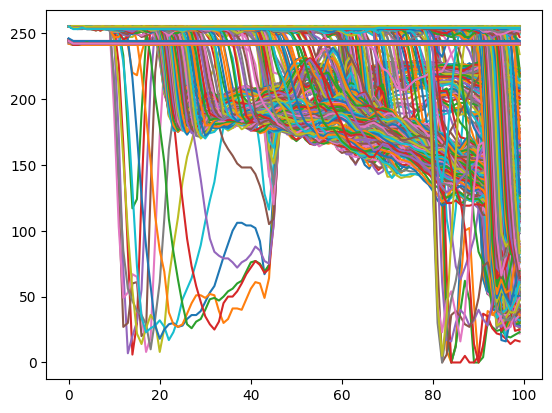

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cropped_image[0:100])
plt.show()

## **Add 2 Images Demo**

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [ ]:
d = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1_280x177.png')
b = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/dup_280x177.png')

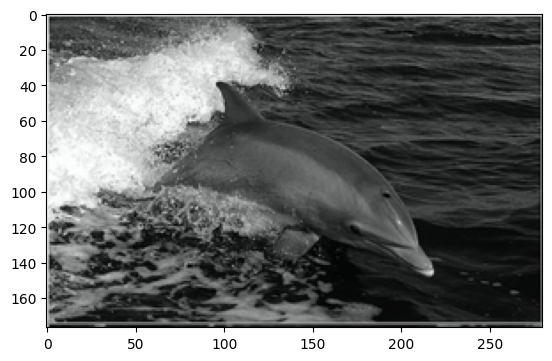

In [ ]:
plt.imshow(b)

In [ ]:
print(d.shape)

(177, 280, 3)


In [ ]:
print(b.shape)

(177, 280, 3)


In [ ]:
db = b+d

In [ ]:
plt.imshow(db)

**Average**

In [ ]:
avergae = (d+b)/2

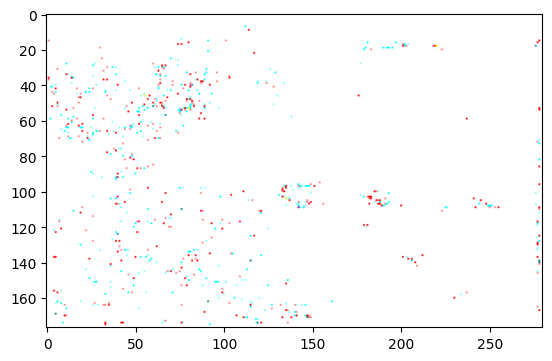

In [ ]:
plt.imshow(avergae)

In [ ]:
# Average the two images
averaged_image = cv2.addWeighted(d, 0.5, b, 0.5, 0)

-1

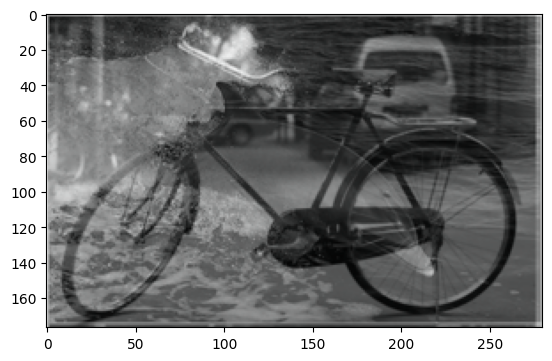

In [ ]:
plt.imshow(averaged_image)
cv2.waitKey(0)

uint8


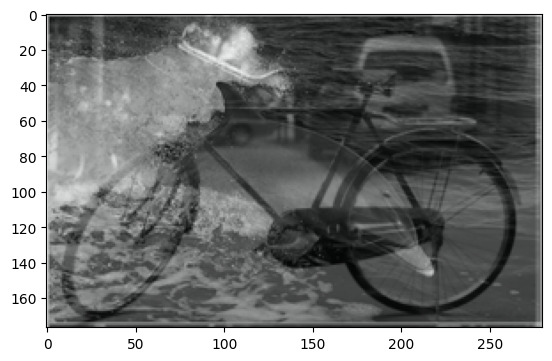

In [ ]:
# Blending ( aka Alpha Blending is a weighted addition)
def myblend(imA,imB,alpha):
    rval = (alpha*imA)+((1-alpha)*imB)
    return rval

#x = myblend(b,d,0.999)
x = cv2.addWeighted(b,0.6,d,0.4,0)
print(x.dtype)
plt.imshow(x)

## **Multiply by a scaler**

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [ ]:
b = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/dup_280x177.png')

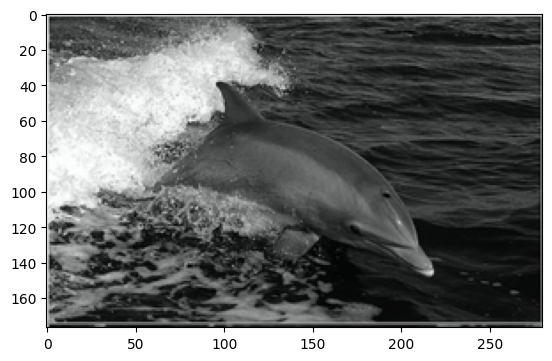

In [ ]:
plt.imshow(b)

In [ ]:
scalar = 2.0

In [ ]:
# Multiply the image by the scalar.
new_image = b * scalar

In [ ]:
# Convert the new image to uint8 format.
new_image = new_image.astype('uint8')

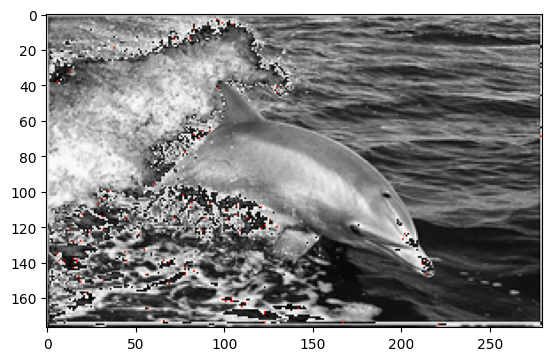

In [ ]:
# Display the new image.
plt.imshow(new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## **Blend 2 Images**

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [ ]:
d = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1_280x177.png')
b = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/dup_280x177.png')

NameError: ignored

In [ ]:
plt.imshow(d)

In [ ]:
result =0.85*b+0.15*d

In [ ]:
result = result.astype('uint8')

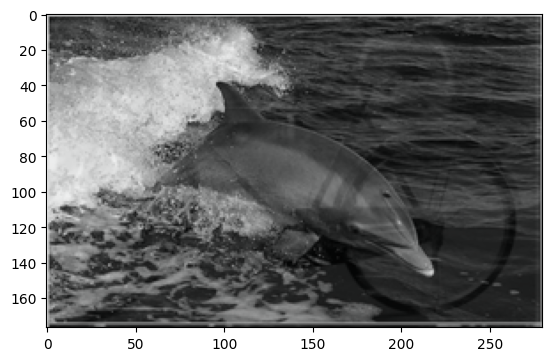

In [ ]:
plt.imshow(result)

## **Common Types of Noise**

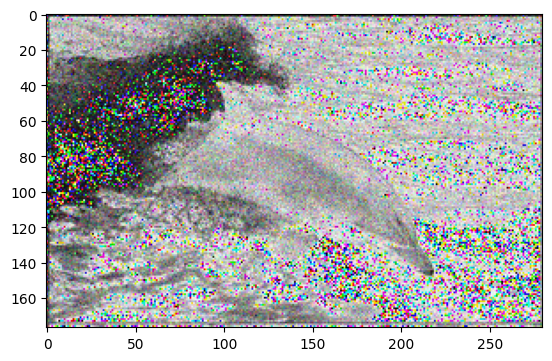

In [ ]:
# Let's add some noise using python only
# Unfortunately python has no purpose built functions like matlab
# So we will build our own
from matplotlib import pyplot as plt
import cv2
import numpy as np

sigma = 6
d = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/dup_280x177.png')
row,col,ch= d.shape
var = 0.01
sigma = var**0.5
gauss = np.random.normal(0,sigma,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
noisy = d + gauss

#  e = d + n
#  plt.imshow(d)
plt.imshow((noisy * 255).astype(np.uint8))


## **Image Difference Demo**

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Read the two images
image1 = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1_280x177.png')
image2 = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/dup_280x177.png')
# Calculate the difference between the two images
diff_color = cv2.absdiff(image1, image2)

# Calculate the difference between the two images
diff_color1 = (image1- image2)

# Calculate the difference between the two images
diff_color2 = (image2- image1)

# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Calculate the difference between the two images
diff_gray = cv2.absdiff(gray1, gray2)

# Threshold the difference image
threshold = 100
diff_binary = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]

# Display the difference image
#  plt.imshow(d)
plt.imshow(diff_color2  )
#cv2.imshow('Difference Image', diff_binary)
cv2.waitKey(0)

NameError: ignored

## **Read image**

**Using OpenCV**

-1

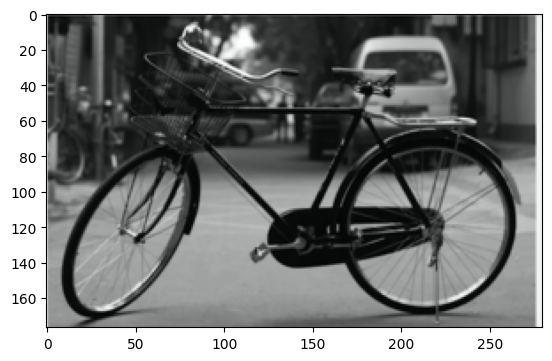

In [ ]:

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# Read the image
img = cv2.imread("/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1_280x177.png")
# Display the image
#cv2_imshow("Image", img)
plt.imshow(img)
cv2.waitKey(0)

Extract only Red Channel

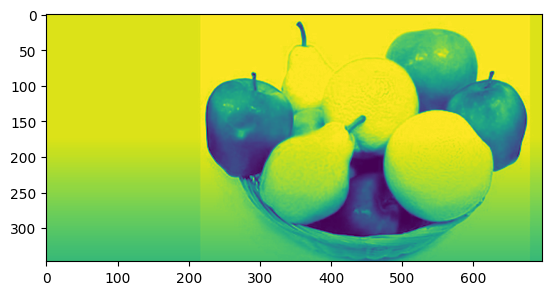

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# Read the image
img = cv2.imread("/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/frut.png")
# Extract the red channel from the image
green_channel = img[:, :, 2]
#upper_red = np.array([255, 255, 255])
# Display the image
#cv2_imshow("Image", img)
plt.imshow(green_channel)
cv2.waitKey(0)
cv2.destroyAllWindows()

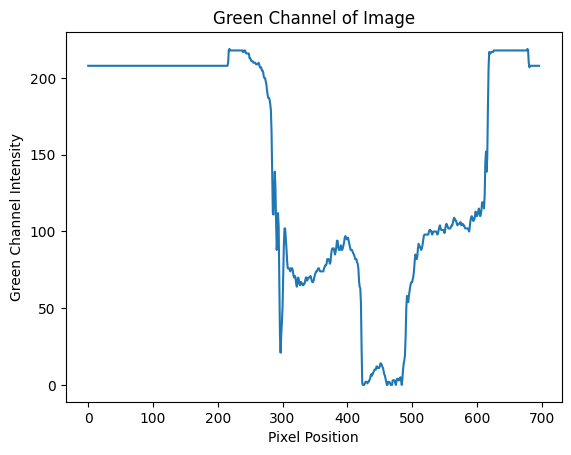

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Read the image
image = cv2.imread("/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/frut.png")

# Extract the green channel from the image
green_channel = image[:, :, 1]

# Plot the green channel of the image
plt.plot(green_channel[256, :])
plt.xlabel("Pixel Position")
plt.ylabel("Green Channel Intensity")
plt.title("Green Channel of Image")
plt.show()

**Using Pillow**

In [ ]:
from PIL import Image
# Open the image
img = Image.open("/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1_280x177.png")
# Display the image
img.show()

## **Image Size and Data Type**

In [ ]:
from PIL import Image

image = Image.open("/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1_280x177.png")
size = image.size

In [ ]:
import numpy as np

image = np.array(Image.open("/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1_280x177.png"))
size = image.shape

In [ ]:
size

In [ ]:
import numpy as np

image = np.array(Image.open("/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1_280x177.png"))
dtype = image.dtype

In [ ]:
dtype

dtype('uint8')

## **Crop an Image**

**Pillow**

In [6]:
from PIL import Image
from matplotlib import pyplot as plt

img = Image.open('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/ 📚Chapter: 2-Image As Function /Image/bicycle1_280x177.png')

print(image.size)

(280, 177)


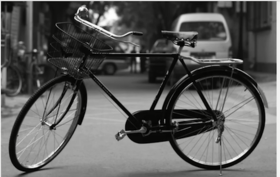

In [25]:

from IPython.display import display

# Display the image.
display(img)

In [26]:
# Crop the image to a square of 500x500 pixels at the center of the image.
box = (100, 100, 280, 280)
cropped_img = img.crop(box)


In [29]:
print(cropped_img.size)

(180, 180)


In [27]:
from PIL import Image
cropped_img.show()

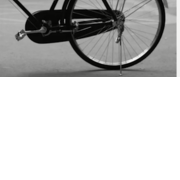

In [28]:
display(cropped_img)

# **Chapter 3:— Filters**


**Table of Content**

1. What are Filters?
2. What is sobel filter?
3. How to create and apply sobel filter?
4. What is the Laplacian filter?
5. How to create and apply the Laplacian filter?

## **3.1-Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

## **3.2. Load the images in the format you want**

In [ ]:
image3 = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/img3.webp'),cv2.COLOR_BGR2RGB)


## **3.3-Plot the image**

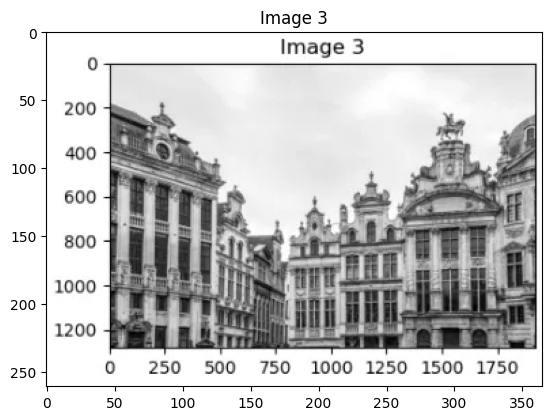

In [ ]:
plt.imshow(image3)
plt.title('Image 3')
plt.show()

## **3.4-Convert our image to grayScale**

In [ ]:
def to_gray(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

## **3.5-Sobel Filter**

**Sobel Filter — Used to detect verticle edges**

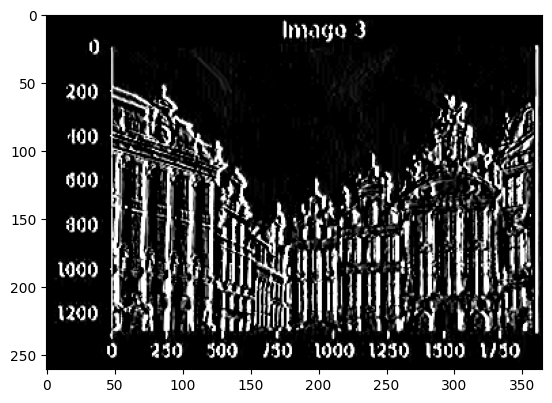

In [ ]:
sobel_x = np.array([[-1,0,1],
                  [-5,0,5],
                  [-1,0,1]])
filtered_x = cv2.filter2D(to_gray(image3),-1,sobel_x)
#represents that 'do not change the format of output image and keep it same as input image'
plt.imshow(filtered_x,cmap='gray')

Let's see how the change in threshold value changes the output

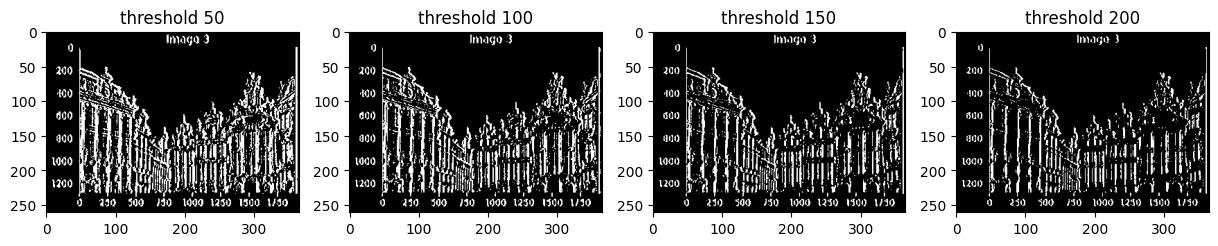

In [ ]:
#  Set a threshold, so that points above threshold will be white/visible
retval, binary_image1 = cv2.threshold(filtered_x,50,255,cv2.THRESH_BINARY)
retval, binary_image2 = cv2.threshold(filtered_x,100,255,cv2.THRESH_BINARY)
retval, binary_image3 = cv2.threshold(filtered_x,150,255,cv2.THRESH_BINARY)
retval, binary_image4 = cv2.threshold(filtered_x,200,255,cv2.THRESH_BINARY)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,8))
ax1.set_title('threshold 50')
ax1.imshow(binary_image1,cmap='gray')
ax2.set_title('threshold 100')
ax2.imshow(binary_image2,cmap='gray')
ax3.set_title('threshold 150')
ax3.imshow(binary_image3,cmap='gray')
ax4.set_title('threshold 200')
ax4.imshow(binary_image4,cmap='gray')

**Sobel Filter — Used to detect horizontal edges**


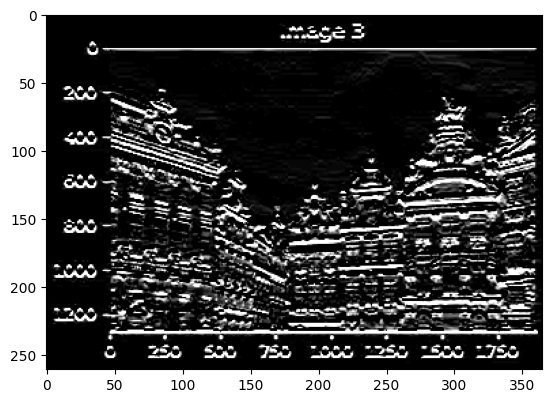

In [ ]:
sobel_y = np.array([[-1,-5,-1],
                   [0,0,0],
                   [1,5,1]])
filtered_y = cv2.filter2D(to_gray(image3),-1,sobel_y)
plt.imshow(filtered_y,cmap='gray')

In [ ]:
#  Set a threshold, so that points above threshold will be white/visible
retval, binary_image1 = cv2.threshold(filtered_y,50,255,cv2.THRESH_BINARY)
retval, binary_image2 = cv2.threshold(filtered_y,100,255,cv2.THRESH_BINARY)
retval, binary_image3 = cv2.threshold(filtered_y,150,255,cv2.THRESH_BINARY)
retval, binary_image4 = cv2.threshold(filtered_y,200,255,cv2.THRESH_BINARY)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,8))
ax1.set_title('threshold 50')
ax1.imshow(binary_image1,cmap='gray')
ax2.set_title('threshold 100')
ax2.imshow(binary_image2,cmap='gray')
ax3.set_title('threshold 150')
ax3.imshow(binary_image3,cmap='gray')
ax4.set_title('threshold 200')
ax4.imshow(binary_image4,cmap='gray')

## **3.6-Laplacian Filter**

In [ ]:
kernel_size = 3
def lap_filter(k):
    laplacian_filter = np.array([[1, 1, 1],
                                 [1, -k, 1],
                                 [1, 1, 1]])
    laplacian_filter = laplacian_filter / np.sum(np.abs(laplacian_filter))
    return laplacian_filter

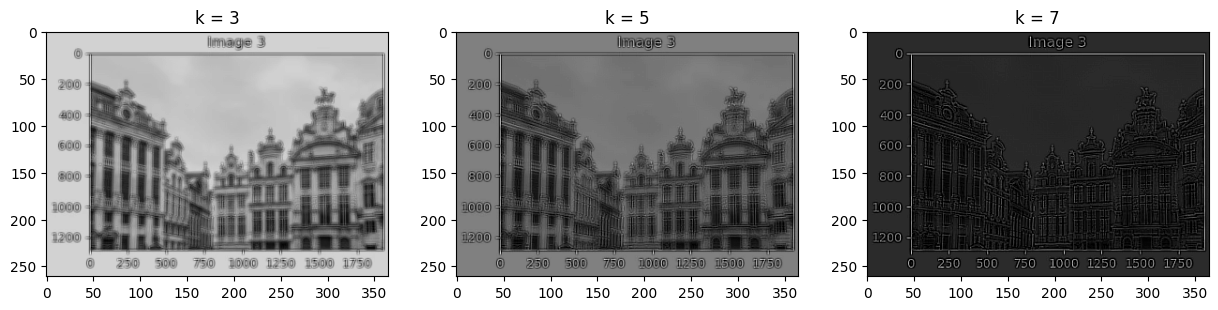

In [ ]:
# Apply Laplacian filter

img = cv2.imread('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Theory /Introduction to Computer Vision/Image/img3.webp', cv2.IMREAD_GRAYSCALE)

filtered_3 = cv2.filter2D(img, -1, lap_filter(3))
filtered_5 = cv2.filter2D(img, -1, lap_filter(5))
filtered_7 = cv2.filter2D(img, -1, lap_filter(7))

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,8))
ax1.set_title('k = 3')
ax1.imshow(filtered_3,cmap='gray')
ax2.set_title('k = 5')
ax2.imshow(filtered_5,cmap='gray')
ax3.set_title('k = 7')
ax3.imshow(filtered_7,cmap='gray')

# **Chapter 3 Image Recognition**

## **3.1-Convolutional Neural Networks**

**Import librariy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Libraries for implementing a CNN
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

**loading the dataset**

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Dataset/Sign Language MNIST Dataset/sign_mnist_test.csv')
test = pd.read_csv('/content/drive/MyDrive/Courses /Data Science /Computer Vision /Dataset/Sign Language MNIST Dataset/sign_mnist_train.csv')

Now, we need to represent the data in such a way that it can represent the image. Note that the raw data has all pixel values stored as an array. It needs to be converted into a 28*28 matrix in this case. The ‘label’ column in the dataset gives us the information about what alphabet the image represents. Some input images are visualized below.

In [ ]:
labels = train.pop('label')  #Pops the label column and stores in 'labels'
labels = to_categorical(labels)
train = train.values
train = np.array([np.reshape(i, (28,28)) for i in train])
train = train / 255

**Training and validation datasetsets**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train, labels, test_size=0.3, random_state=41)

In [ ]:
#Reshaping the training and validation sets
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_val = X_val.reshape(X_val.shape[0], 28,28,1)

**Building Our CNN**

Notice that the Dropout set to 0.4 at the end. You can tweak that value as well. At the backend, it essentially reduces overfitting, i.e the phenomenon when the model performs really well on the training data but miserably fails with the test data.

In [ ]:
model = Sequential()
#input_shape’ parameter, you will have to use the dimensions of your input image.
#Make a note of ‘relu’ and ‘softmax’, both of which are the activation functions.
model.add(Conv2D(8, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
# ‘Dense’ bracket. 25 here signifies the number of outcomes (or the number of classes) for my dataset. It may vary depending on the shape of your dataset.
model.add(Dense(25, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

**Train your model**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Code for Training our Model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, batch_size=512)

Epoch 1/50
10/10 [==============================] - 4s 251ms/step - loss: 3.2052 - accuracy: 0.0663 - val_loss: 3.1639 - val_accuracy: 0.0618
Epoch 2/50
10/10 [==============================] - 1s 151ms/step - loss: 3.1543 - accuracy: 0.0753 - val_loss: 3.1411 - val_accuracy: 0.0632
Epoch 3/50
10/10 [==============================] - 1s 136ms/step - loss: 3.1295 - accuracy: 0.0855 - val_loss: 3.1164 - val_accuracy: 0.0827
Epoch 4/50
10/10 [==============================] - 1s 150ms/step - loss: 3.1035 - accuracy: 0.0978 - val_loss: 3.0748 - val_accuracy: 0.0869
Epoch 5/50
10/10 [==============================] - 1s 146ms/step - loss: 3.0499 - accuracy: 0.1207 - val_loss: 3.0067 - val_accuracy: 0.1924
Epoch 6/50
10/10 [==============================] - 2s 245ms/step - loss: 2.9656 - accuracy: 0.1731 - val_loss: 2.8905 - val_accuracy: 0.2388
Epoch 7/50
10/10 [==============================] - 2s 241ms/step - loss: 2.8307 - accuracy: 0.2287 - val_loss: 2.7175 - val_accuracy: 0.3499
Epoch 

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

KeyError: ignored

**Model performs on the test dataset.**

In [ ]:
y_test = test.pop('label')
y_test = to_categorical(y_test)
y_test.shape
X_test = test.values
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])
X_test = X_test / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_test.shape
#Recognizing images on the test dataset
predictions = model.predict(X_test)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("The test accuracy is: ", test_accuracy)

858/858 [==============================] - 10s 11ms/step
The test accuracy is:  0.6593698779821526


# **References**

[1-Computer Vision Tutorial Series M1C1](https://pub.towardsai.net/computer-vision-tutorial-series-m1c1-535c27cd36ca)

[2-Module 1 — Image Representation and Classification](https://medium.com/towards-artificial-intelligence/computer-vision-tutorial-series-m1c2-13628dceab33)

[3-Computer Vision Tutorial Series M1C2](https://pub.towardsai.net/computer-vision-tutorial-series-m1c2-13628dceab33)

[4-Module 2 — Convolutional Filters and Edge Detection](https://pub.towardsai.net/computer-vision-tutorial-series-m2c2-62b8272eb45d)

[5-CS6476-Computer Vision](https://monzersaleh.github.io/GeorgiaTech/CS6476_CV/CS6476_ComputerVision.html)

[6-Applied Machine Learning: Part 2](https://medium.com/the-research-nest/applied-machine-learning-part-2-a4ba715649d1)